# Unit 5 - Financial Planning - Part I - Personal Financial Planner

In [18]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [19]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [20]:
# Set current amount of crypto assets

my_btc=1.2
my_eth=5.3


In [21]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [22]:
# Fetch current BTC price by executing `GET` request with url
btc_data = requests.get(btc_url)

# Fetch current ETH price by executing `GET` request with url
eth_data = requests.get(eth_url)

In [23]:
# Print `response_data variable`

print(btc_data)
print(eth_data)

<Response [200]>
<Response [200]>


In [24]:
# Store response using `content` attribute
btc_content = btc_data.content

# Format data as JSON
btc_now_data = btc_data.json()

In [25]:
# Store response using `content` attribute
eth_content = eth_data.content
# Format data as JSON
eth_now_data = eth_data.json()

In [26]:
eth_prices = pd.DataFrame()

eth_prices = eth_now_data["data"]["1027"]["quotes"]["USD"]["price"]

In [27]:
btc_prices = pd.DataFrame()

btc_prices = btc_now_data["data"]["1"]["quotes"]["USD"]["price"]

In [28]:
print(f'The current BTC Price is: {btc_prices}')

The current BTC Price is: 60688.0


In [29]:
print(f'The current ETH Price is: {eth_prices}')

The current ETH Price is: 3816.01


In [30]:
# Compute current value of my crpto
my_btc_value = btc_prices * my_btc
my_eth_value = eth_prices * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $72825.60
The current value of your 5.3 ETH is $20224.85


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [31]:
# Set current amount of shares

# AGG: Bonds
my_agg = 200

#SPY: Stocks
my_spy = 50

In [32]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [33]:
# Set the Bonds & S&P tickers
ticker = ["AGG","SPY"]

# Format current date as ISO format
today = pd.Timestamp("2021-10-13", tz="America/Chicago").isoformat()

# Set timeframe to '1D'
timeframe = "1D"


# Get 1 year's worth of historical data for Bonds & S&P tickers
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=today,
    end=today,
    limit=1000,
).df

# Display sample data
df_ticker.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-10-13 00:00:00-04:00  114.43  114.64  114.415  114.61  5301180  434.71   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-13 00:00:00-04:00  436.05  431.54  435.13  63943229

In [34]:
# Fetch the current closing prices from the DataFrame
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.61
Current SPY closing price: $435.13


In [35]:
# Compute the current value of shares in dollars
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
# print(f"The current value of the agg shares is ${agg_value:0.2f}")
# print(f"The current value of the spy shares is ${spy_value:0.2f}")

The current value of your 50 SPY shares is $21756.50
The current value of your 200 AGG shares is $22922.00


### Savings Health Analysis

In [36]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
all_money = {'crypto': (my_btc_value+my_eth_value), 'shares': (my_agg_value+my_spy_value)}
money=pd.Series(all_money)

# Create savings DataFrame
df_savings=pd.DataFrame({'amount': money})

# Display savings DataFrame
display(df_savings)

,amount
crypto,93050.453
shares,44678.500


<AxesSubplot:ylabel='None'>

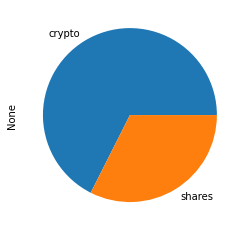

In [37]:
# Plot savings pie chart
# df_savings.plot(kind='pie')
money.plot(kind='pie')

In [38]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_agg_value + my_spy_value + my_btc_value + my_eth_value

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! You have enough money in your emergency fund.')
else:
    print("save more")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-14', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2021-10-14', tz='America/Chicago').isoformat()

In [40]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker = ["AGG","SPY"]

# Set timeframe to '1D'
timeframe = "1D"

# Get 1 year's worth of historical data for Bonds and Stocks
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open     high      low   close   volume    open   
time                                                                           
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.11  2706969  256.19   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.00  1488075  255.99   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.24  1527412  256.50   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.53  1719161  257.07   
2017-10-31 00:00:00-04:00  109.52  109.550  109.440  109.45  2427946  257.18   

                                                              
                             high      low   close    volume  
time                                                          
2017-10-25 00:00:00-04:00  256.31  254.000  255.30  72200254  
2017-10-26 00:00:00-04:00  256.30  255.560  255.59  37718330  
2017-10-27 00:00:00-04:00  257.89  256.160  257.68  49910859  
2017-10-30 00:00:00-04:00  257.60  256.410  256.80  37073374  
2017-10-31 00:00:00-04:00  257.44  256.805  257.11  35711419

In [41]:
# Configure a Monte Carlo simulation (n=500) to forecast 30 years cumulative returns
MC_retire_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [42]:
# Print the simulation input data
MC_retire_dist.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
time                                                                   
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.11  2706969   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.00  1488075   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.24  1527412   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.53  1719161   
2017-10-31 00:00:00-04:00  109.52  109.550  109.440  109.45  2427946   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-10-25 00:00:00-04:00          NaN  256.19  256.31  254.000  255.30   
2017-10-26 00:00:00-04:00    -0.001008  255.99  256.30  255.560  255.59   
2017-10-27 00:00:00-04:00     0.002202  256.50  257.89  256.160  257.68   
2017-10-30 00:00:00-04:00     0.002655  257.07  257.60  256.410  256.80   
2017-10-31 00:00:00-04:00    -0.000730  257.18  257.44  256.805  257.11   

                                                  
                             volume daily_return  
time                                              
2017-10-25 00:00:00-04:00  72200254          NaN  
2017-10-26 00:00:00-04:00  37718330     0.001136  
2017-10-27 00:00:00-04:00  49910859     0.008177  
2017-10-30 00:00:00-04:00  37073374    -0.003415  
2017-10-31 00:00:00-04:00  35711419     0.001207

In [43]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_retire_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999325,0.994315,0.996938,1.001657,0.994120,0.995559,1.005054,0.998324,0.987992,0.996483,...,0.994021,0.989234,0.998303,1.009566,0.993586,1.006276,1.006214,0.996254,1.002960,0.993432
2,0.999284,0.997607,1.005203,1.004246,0.996287,0.991902,1.001105,1.006097,0.985354,1.007977,...,0.986663,0.986226,0.989209,1.013175,0.989126,0.994584,1.010086,0.989072,1.003158,0.993845
3,0.998127,0.995080,0.996869,1.010853,0.992938,0.997899,0.999619,1.013882,0.993574,1.010728,...,0.985910,0.993267,0.990639,1.013797,0.982053,0.994537,1.016464,0.980297,1.001811,1.003604
4,0.992381,0.991707,0.996211,1.005623,0.984124,0.999798,0.990179,1.026523,0.994142,1.016906,...,0.991052,0.996140,0.984899,1.012380,0.988509,0.990059,1.017337,0.980756,0.993917,1.001806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.222209,11.031344,9.031850,6.520389,29.333518,42.707675,16.371242,8.022008,7.740335,18.045854,...,5.815907,7.094201,5.105307,11.649400,18.075659,7.843696,10.150026,7.806079,9.408643,8.376252
7557,19.081418,10.996496,9.039284,6.476108,29.116184,42.707359,16.396925,8.029855,7.617453,18.042264,...,5.849798,7.084407,5.115955,11.618370,18.028100,7.841675,10.195211,7.858833,9.296478,8.244267
7558,18.985497,11.071930,9.069447,6.497552,29.183254,42.827146,16.111577,8.029560,7.627372,17.984878,...,5.845676,7.088504,5.067468,11.659525,18.123667,7.780473,10.216881,7.754412,9.366492,8.175159
7559,18.994225,11.107978,9.025449,6.550475,28.969715,42.974322,16.221814,8.117780,7.536973,18.070116,...,5.879224,7.056455,5.093313,11.596484,18.087571,7.820178,10.205832,7.631287,9.433438,8.104623


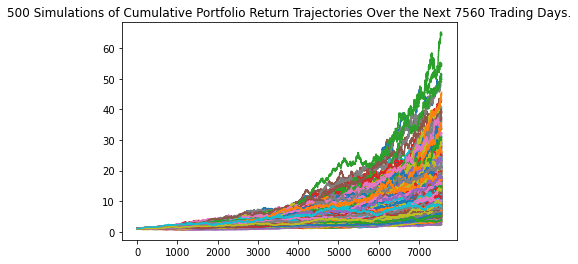

In [44]:
# Plot simulation outcomes
line_plot = MC_retire_dist.plot_simulation()

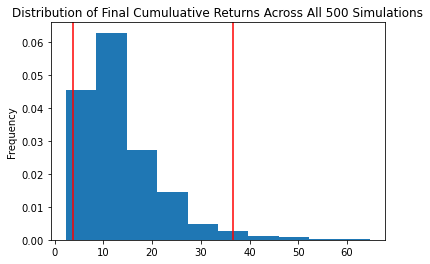

In [45]:
# Plot probability distribution and confidence intervals
dist_plot = MC_retire_dist.plot_distribution()

### Retirement Analysis

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
retire_tbl = MC_retire_dist.summarize_cumulative_return()

# Print summary statistics
print(retire_tbl)

count           500.000000
mean             13.691972
std               8.527468
min               2.309612
25%               8.116060
50%              11.408496
75%              17.218409
max              64.731254
95% CI Lower      3.824532
95% CI Upper     36.596088
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [47]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
#Lower as defined above, is the 8th index, 15000 as stated in instructions, 2 digits rounded to
ci_lower = round(retire_tbl[8]*initial_investment,2)
#Upper as defined above, is the 9th index, 15000 as stated in instructions, 2 digits rounded to
ci_upper = round(retire_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $76490.64 and $731921.75


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [48]:
# Set updated investment (after 50% increase)
updated_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
#Lower as defined above, is the 8th index, 15000 as stated in instructions, 2 digits rounded to
more_ci_lower = round(retire_tbl[8]*updated_investment,2)
#Upper as defined above, is the 9th index, 15000 as stated in instructions, 2 digits rounded to
more_ci_upper = round(retire_tbl[9]*updated_investment,2)

# Print results
print(f"There is a 95% chance that an increased investment of ${updated_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${more_ci_lower} and ${more_ci_upper}")

There is a 95% chance that an increased investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $114735.95 and $1097882.63


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [49]:
# Retirement fund goal: $6000/mo = $ 72000 per year for 10 years or $ 720,000 Fund amount.
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns that would equal that amount.

# Goal of this code:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns of a larger investment 
# and/or riskier options in order to still have $ 720,000 available in 5 years. 

# New portfolio weights: 75% stock, 25% bonds

# Configure a Monte Carlo simulation (n=500) to forecast one years cumulative returns
MC_retr5yr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75,.25],
    num_simulation = 500,
    num_trading_days = 252*5
)

print(MC_retr5yr_dist.portfolio_data.head())

                              AGG                                     \
                             open     high      low   close   volume   
time                                                                   
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.11  2706969   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.00  1488075   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.24  1527412   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.53  1719161   
2017-10-31 00:00:00-04:00  109.52  109.550  109.440  109.45  2427946   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-10-25 00:00:00-04:00          NaN  256.19  256.31  254.000  255.30   
2017-10-26 00:00:00-04:00    -0.001008  255.99  256.30  255.560  255.59   
2017-10-27 00:00:00-04:00     0.002202  256.50  

In [50]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
print(MC_retr5yr_dist.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

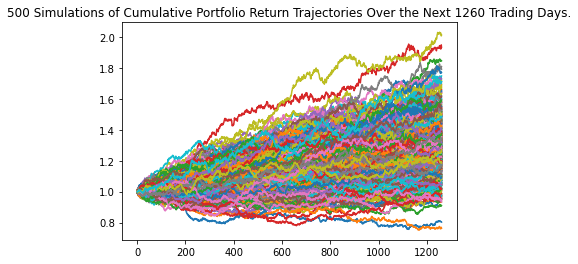

In [51]:
# Plot simulation outcomes
line_plot = MC_retr5yr_dist.plot_simulation()

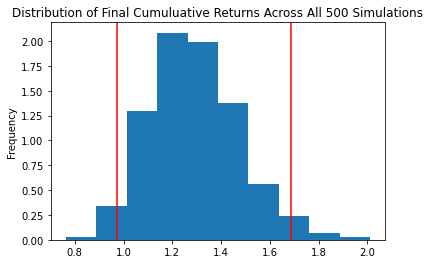

In [52]:
# Plot probability distribution and confidence intervals
dist_plot = MC_retr5yr_dist.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
retr5yr_tbl = MC_retr5yr_dist.summarize_cumulative_return()

# Print summary statistics
print(retr5yr_tbl)

count           500.000000
mean              1.290620
std               0.184568
min               0.763372
25%               1.163892
50%               1.283017
75%               1.414790
max               2.011395
95% CI Lower      0.971916
95% CI Upper      1.686028
Name: 1260, dtype: float64


In [54]:
# Set nest-egg investment in 5-year plan here:
nest5_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
n5_ci_lower = round(retr5yr_tbl[8]*nest5_investment,2)
#Upper as defined above, is the 9th index, 15000 as stated in instructions, 2 digits rounded to
n5_ci_upper = round(retr5yr_tbl[9]*nest5_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${nest5_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${n5_ci_lower} and ${n5_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58314.97 and $101161.67


### Ten Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Retirement fund goal: $6000/mo = $ 72000 per year for 10 years or $ 720,000 Fund amount.
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns that would equal that amount.


# Goal of this code:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns of a larger investment 
# and/or riskier options in order to still have $ 720,000 available in 5 years. 

# This portfolio: 60% stock, 40% bonds

# Configure a Monte Carlo simulation (n=100) to forecast one years cumulative returns
MC_retr10yr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

print(MC_retr10yr_dist.portfolio_data.head())

                              AGG                                     \
                             open     high      low   close   volume   
time                                                                   
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.11  2706969   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.00  1488075   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.24  1527412   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.53  1719161   
2017-10-31 00:00:00-04:00  109.52  109.550  109.440  109.45  2427946   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-10-25 00:00:00-04:00          NaN  256.19  256.31  254.000  255.30   
2017-10-26 00:00:00-04:00    -0.001008  255.99  256.30  255.560  255.59   
2017-10-27 00:00:00-04:00     0.002202  256.50  

In [56]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
print(MC_retr10yr_dist.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

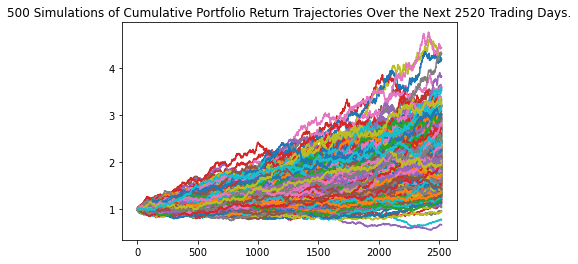

In [57]:
# Plot simulation outcomes
line_plot = MC_retr10yr_dist.plot_simulation()

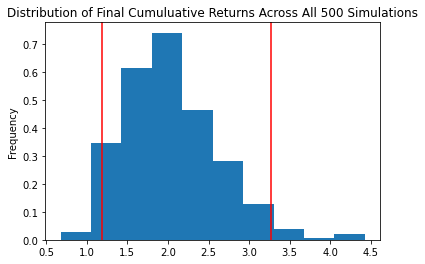

In [58]:
# Plot probability distribution and confidence intervals
dist_plot = MC_retr10yr_dist.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
retr10yr_tbl = MC_retr10yr_dist.summarize_cumulative_return()

# Print summary statistics
print(retr10yr_tbl)

count           500.000000
mean              2.035260
std               0.576716
min               0.676329
25%               1.620359
50%               1.952382
75%               2.376215
max               4.426509
95% CI Lower      1.183006
95% CI Upper      3.271450
Name: 2520, dtype: float64


In [60]:
# Set nest egg increased investment amount to $ 60,000
nest10_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
n10_ci_lower = round(retr10yr_tbl[8]*nest10_investment,2)
#Upper as defined above, is the 9th index, 15000 as stated in instructions, 2 digits rounded to
n10_ci_upper = round(retr10yr_tbl[9]*nest10_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${nest10_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${n10_ci_lower} and ${n10_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70980.36 and $196286.99
